In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [5]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [6]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

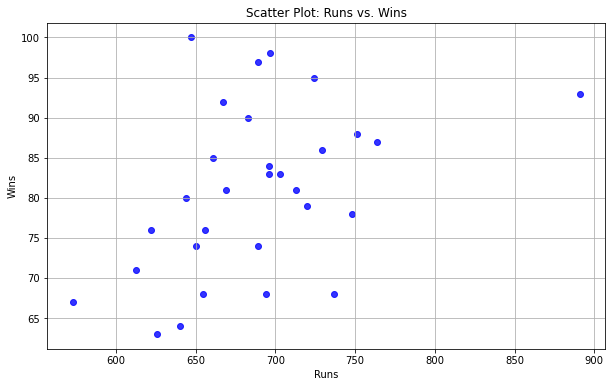

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(df['R'], df['W'], alpha=0.8, c='blue')
plt.title('Scatter Plot: Runs vs. Wins')
plt.xlabel('Runs')
plt.ylabel('Wins')
plt.grid(True)
plt.show()

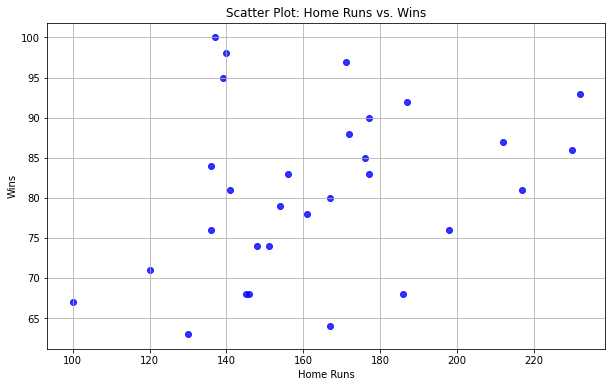

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(df['HR'], df['W'], alpha=0.8, c='blue')
plt.title('Scatter Plot: Home Runs vs. Wins')
plt.xlabel('Home Runs')
plt.ylabel('Wins')
plt.grid(True)
plt.show()

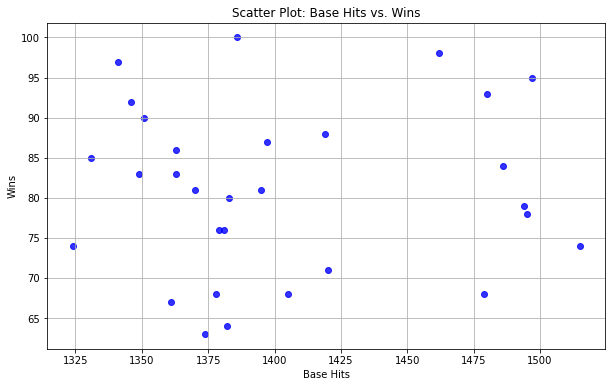

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df['H'], df['W'], alpha=0.8, c='blue')
plt.title('Scatter Plot: Base Hits vs. Wins')
plt.xlabel('Base Hits')
plt.ylabel('Wins')
plt.grid(True)
plt.show()

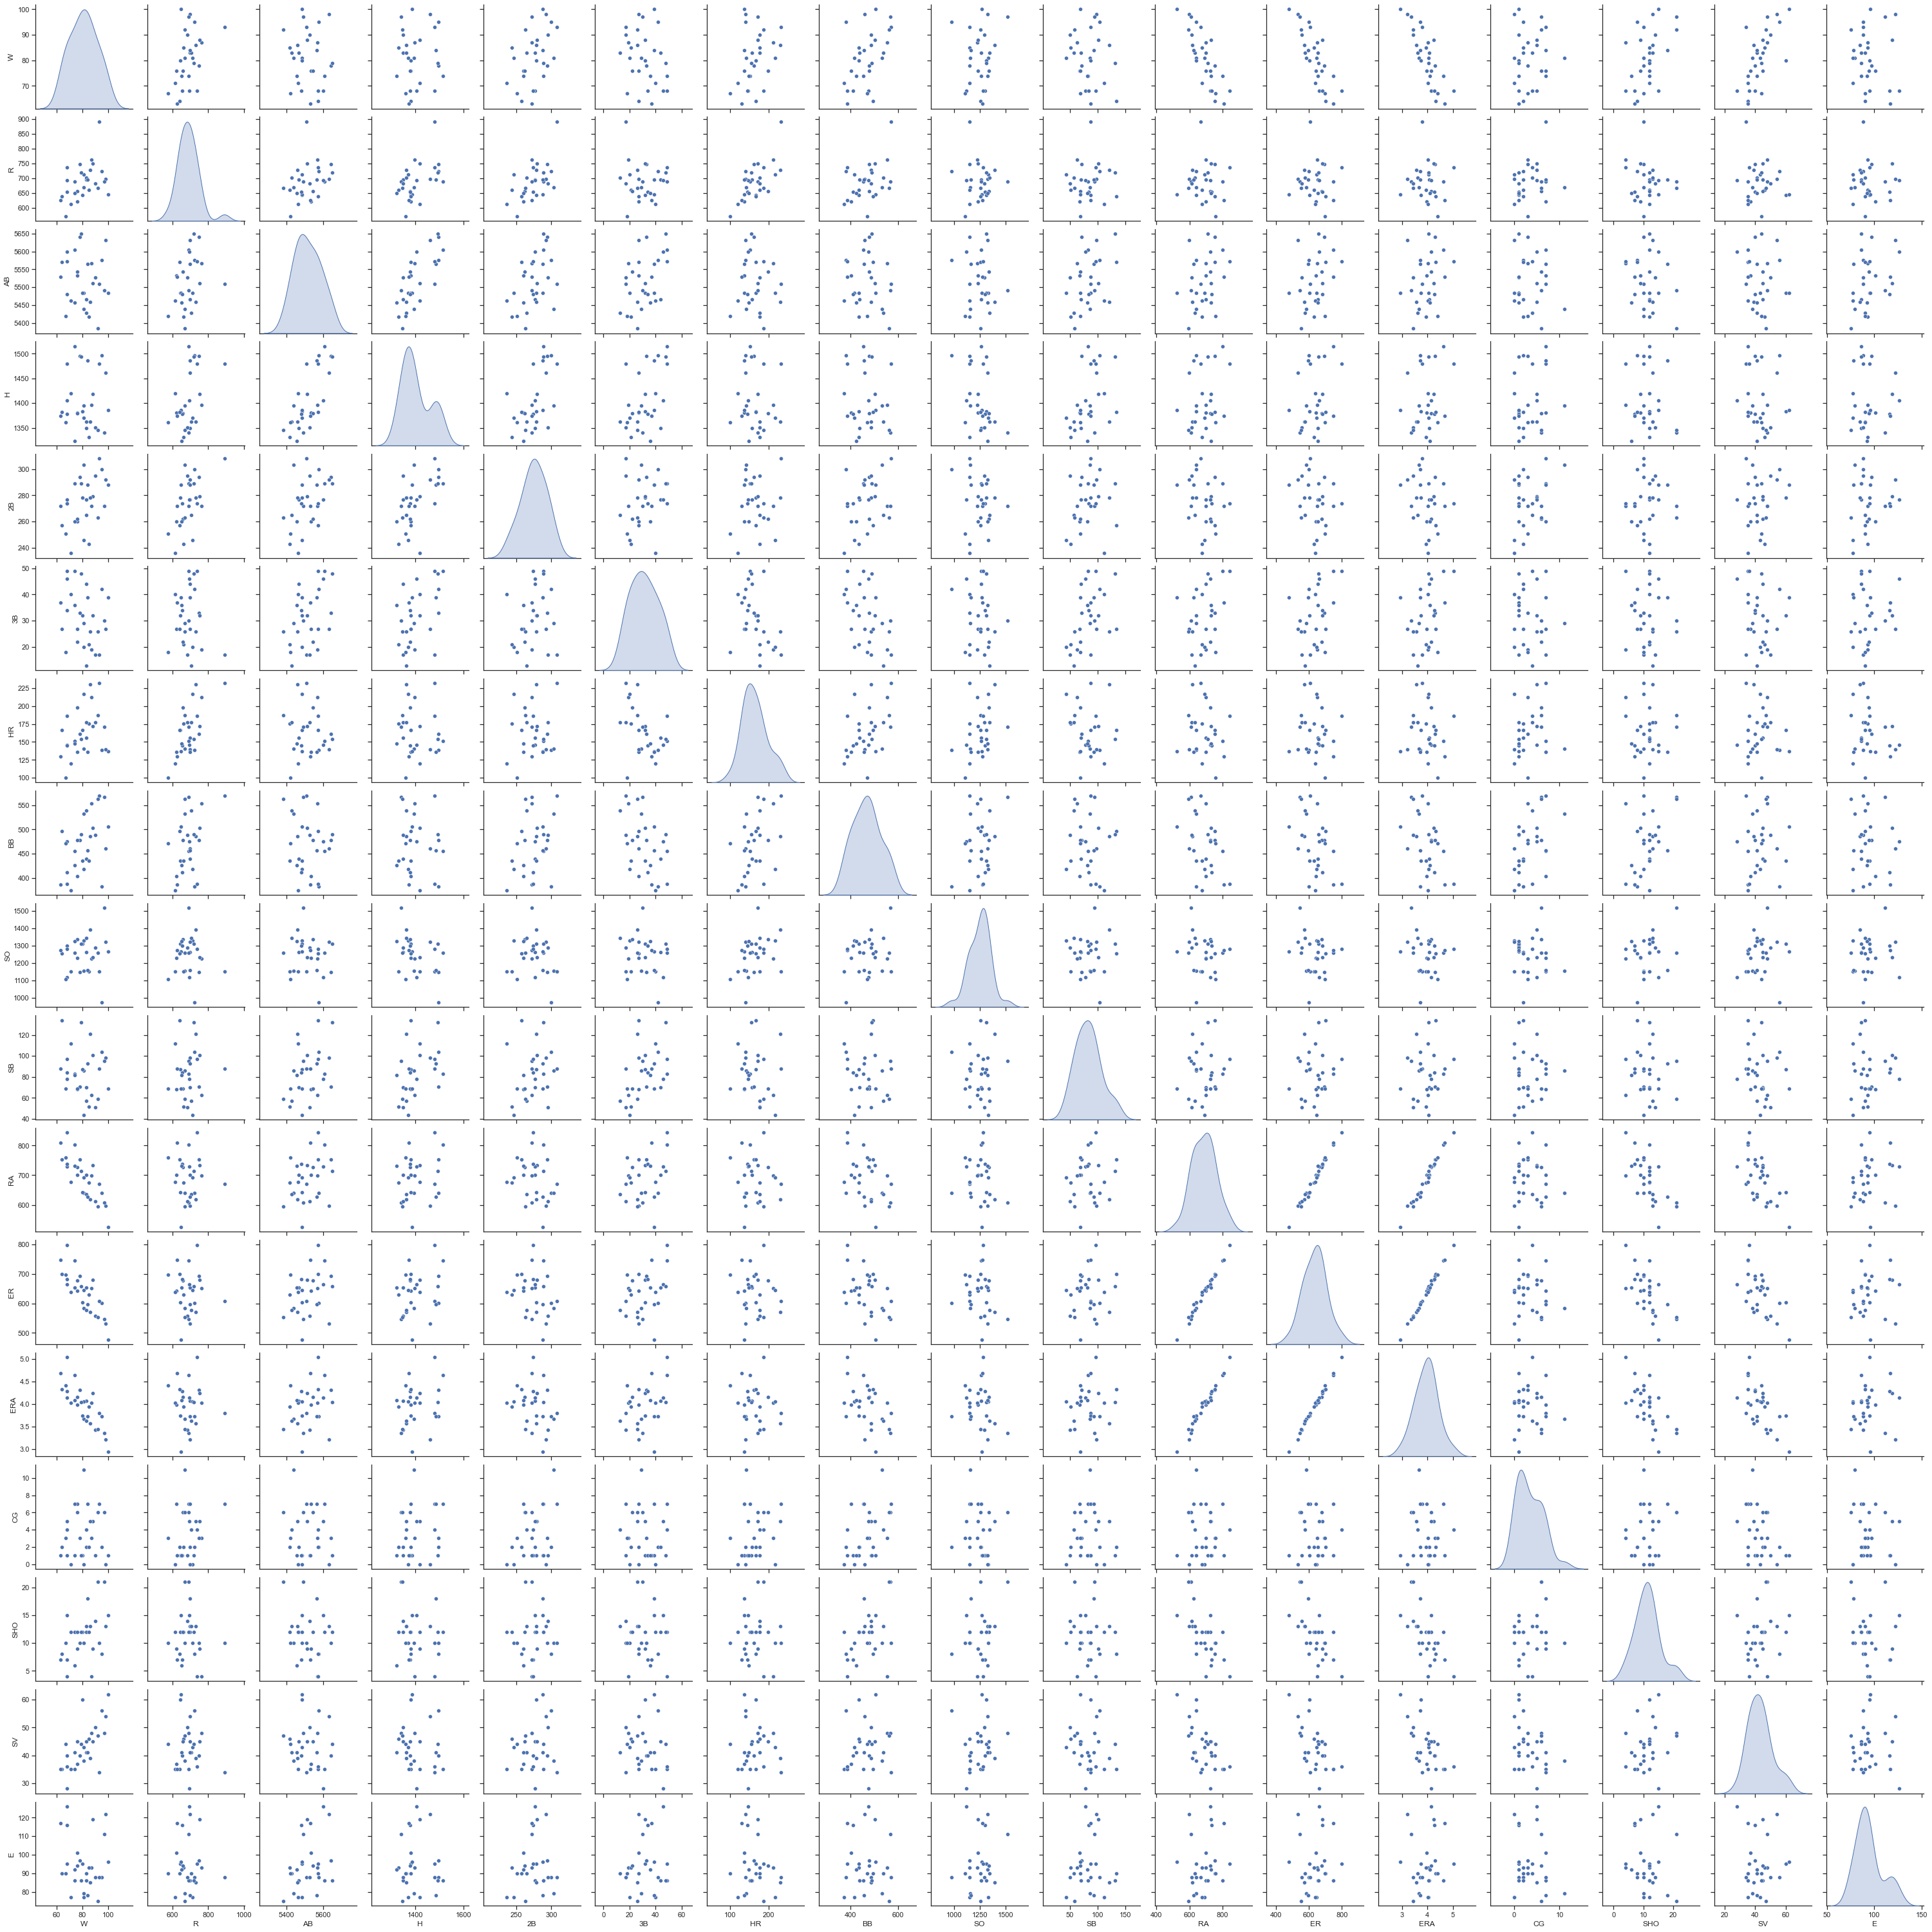

In [10]:
sns.set(style="ticks")
sns.pairplot(df, diag_kind="kde", markers='o')
plt.show()

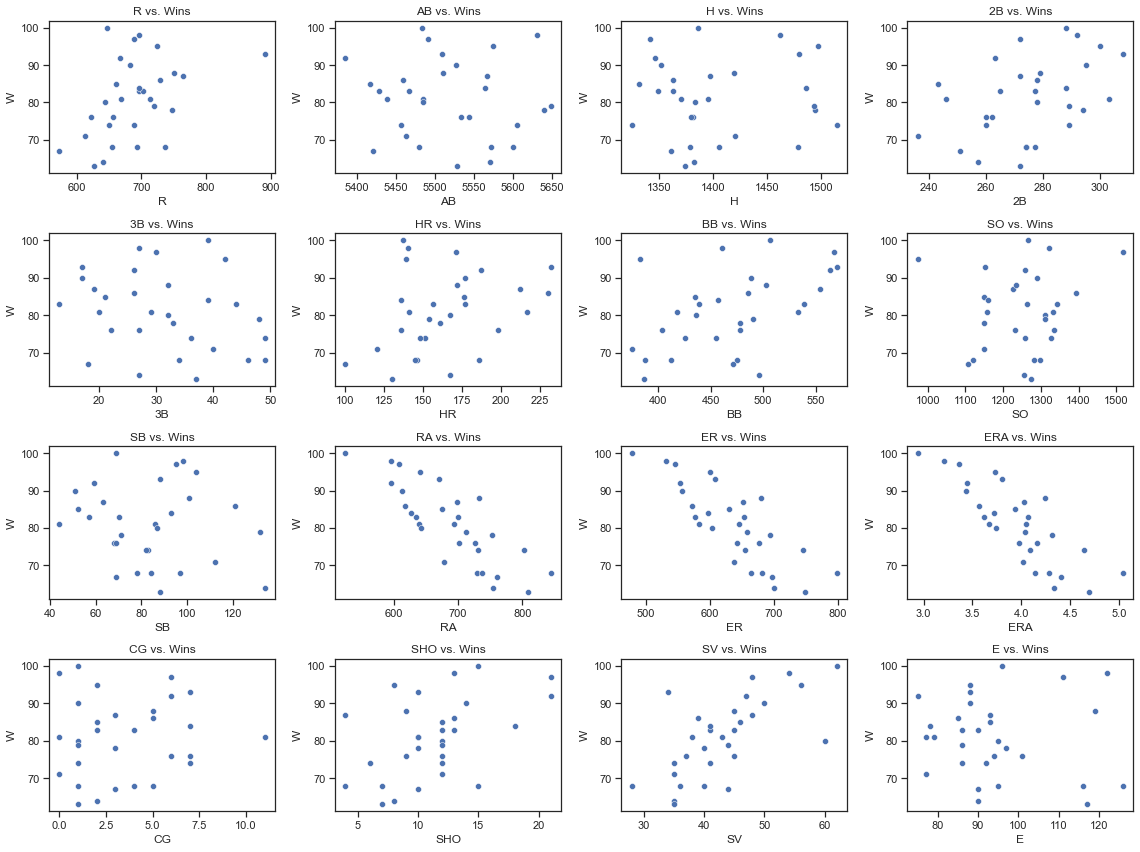

In [11]:
all_features = ['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 12))
fig.subplots_adjust(hspace=0.5)

for i, feature in enumerate(all_features[1:]): 
    row = i // 4
    col = i % 4
    sns.scatterplot(x=feature, y='W', data=df, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} vs. Wins')

for i in range(len(all_features) - 1, len(axes.flat)):
    fig.delaxes(axes.flat[i])

plt.tight_layout()
plt.show()

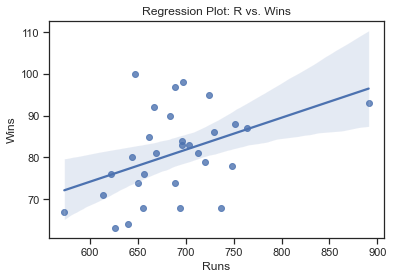

In [12]:
sns.regplot(x='R', y='W', data=df)

# Set plot labels and title
plt.xlabel('Runs')
plt.ylabel('Wins')
plt.title('Regression Plot: R vs. Wins')

# Show the plot
plt.show()

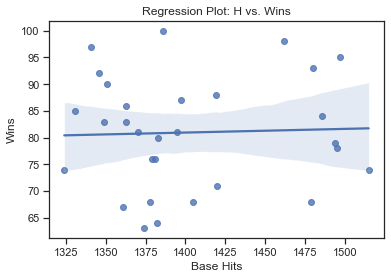

In [13]:
sns.regplot(x='H', y='W', data=df)


plt.xlabel('Base Hits')
plt.ylabel('Wins')
plt.title('Regression Plot: H vs. Wins')

plt.show()

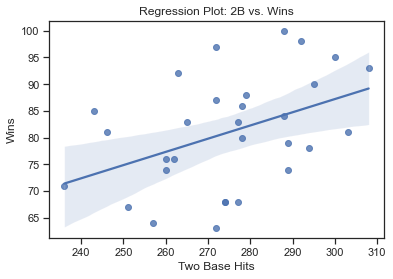

In [14]:
sns.regplot(x='2B', y='W', data=df)


plt.xlabel('Two Base Hits')
plt.ylabel('Wins')
plt.title('Regression Plot: 2B vs. Wins')

plt.show()

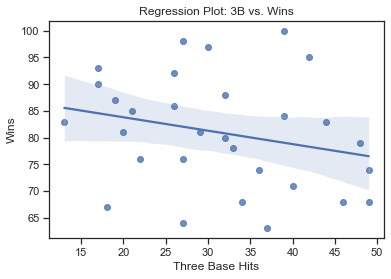

In [15]:
sns.regplot(x='3B', y='W', data=df)


plt.xlabel('Three Base Hits')
plt.ylabel('Wins')
plt.title('Regression Plot: 3B vs. Wins')

plt.show()

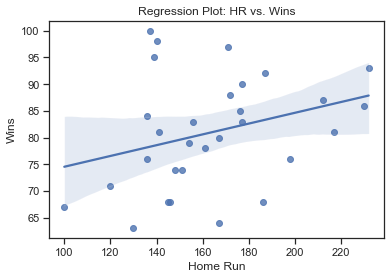

In [16]:
sns.regplot(x='HR', y='W', data=df)


plt.xlabel('Home Run')
plt.ylabel('Wins')
plt.title('Regression Plot: HR vs. Wins')

plt.show()

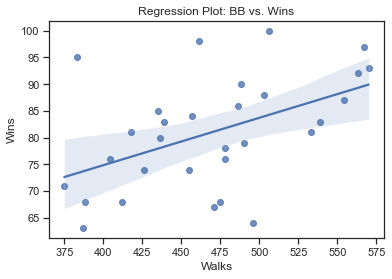

In [17]:
sns.regplot(x='BB', y='W', data=df)


plt.xlabel('Walks')
plt.ylabel('Wins')
plt.title('Regression Plot: BB vs. Wins')

plt.show()

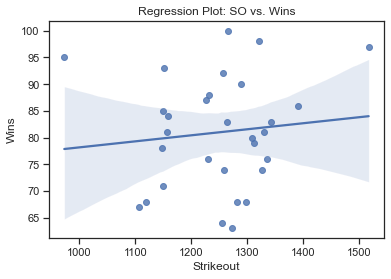

In [18]:
sns.regplot(x='SO', y='W', data=df)


plt.xlabel('Strikeout')
plt.ylabel('Wins')
plt.title('Regression Plot: SO vs. Wins')

plt.show()

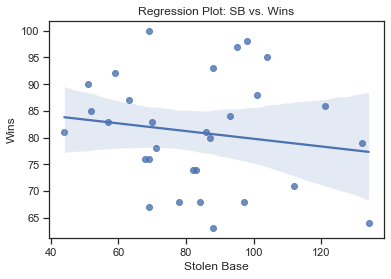

In [19]:
sns.regplot(x='SB', y='W', data=df)


plt.xlabel('Stolen Base')
plt.ylabel('Wins')
plt.title('Regression Plot: SB vs. Wins')

plt.show()

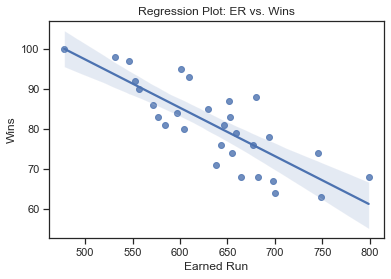

In [20]:
sns.regplot(x='ER', y='W', data=df)


plt.xlabel('Earned Run')
plt.ylabel('Wins')
plt.title('Regression Plot: ER vs. Wins')

plt.show()

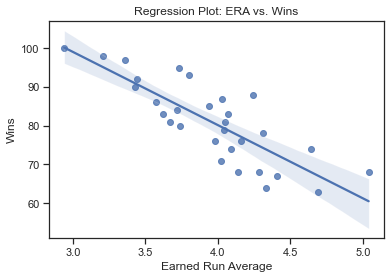

In [21]:
sns.regplot(x='ERA', y='W', data=df)


plt.xlabel('Earned Run Average')
plt.ylabel('Wins')
plt.title('Regression Plot: ERA vs. Wins')

plt.show()

Data Pre-Processing

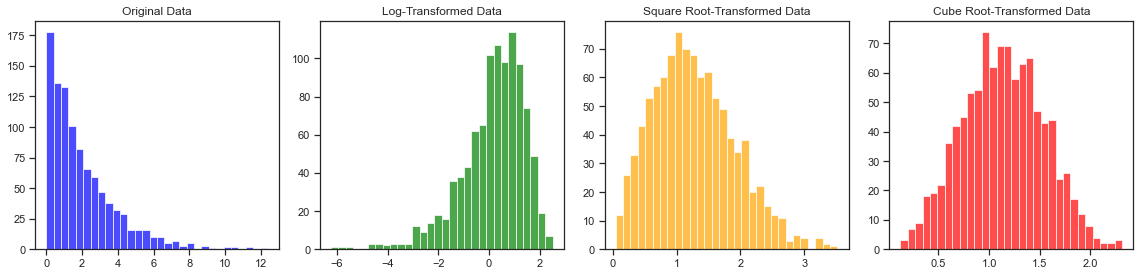

In [22]:
np.random.seed(0)
data = np.random.exponential(scale=2.0, size=(1000, 17)) 

df = pd.DataFrame(data, columns=[f'Column_{i+1}' for i in range(17)])


plt.figure(figsize=(16, 4))
plt.subplot(1, 4, 1)
plt.hist(df['Column_1'], bins=30, color='blue', alpha=0.7)
plt.title('Original Data')

transformed_data_log = np.log(df)
transformed_data_sqrt = np.sqrt(df)
transformed_data_cbrt = np.cbrt(df)

colors = ['green', 'orange', 'red']


for i, transformed_data in enumerate([transformed_data_log, transformed_data_sqrt, transformed_data_cbrt]):
    plt.subplot(1, 4, i + 2)
    plt.hist(transformed_data['Column_1'], bins=30, color=colors[i], alpha=0.7)
    method_name = ['Log-Transformed', 'Square Root-Transformed', 'Cube Root-Transformed'][i]
    plt.title(f'{method_name} Data')

plt.tight_layout()
plt.show()

In [23]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (df < lower_bound) | (df > upper_bound)

num_outliers = outliers.sum()

In [24]:
from scipy import stats

z_scores = np.abs(stats.zscore(df))

threshold = 3

outliers = z_scores > threshold

num_outliers = outliers.sum()

In [25]:
num_outliers

306

<AxesSubplot:>

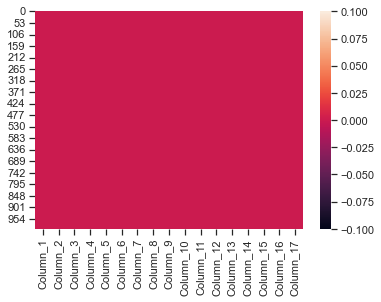

In [26]:
sns.heatmap(df.isnull())

In [27]:
correlation=df.corr()

In [28]:
correlation

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11,Column_12,Column_13,Column_14,Column_15,Column_16,Column_17
Column_1,1.000000,0.009007,-0.041830,0.067760,0.009079,0.009101,0.039790,0.019808,-0.027398,-0.024031,-0.015617,-0.001268,-0.040419,-0.028119,-0.031201,0.025807,-0.041231
Column_2,0.009007,1.000000,-0.011051,0.009592,-0.013087,0.026513,0.087083,0.005521,-0.014859,-0.007021,-0.023636,-0.004983,-0.019565,-0.004500,-0.033805,0.002163,0.011710
Column_3,-0.041830,-0.011051,1.000000,-0.027003,0.005085,-0.026477,0.062584,0.018343,0.028621,-0.001796,-0.026436,-0.008510,-0.040014,0.033166,-0.038320,0.005522,0.019197
Column_4,0.067760,0.009592,-0.027003,1.000000,0.023091,0.030495,-0.002254,-0.042299,-0.025532,-0.020765,0.078395,0.026337,-0.026979,0.036797,0.053621,-0.052978,0.026856
Column_5,0.009079,-0.013087,0.005085,0.023091,1.000000,0.030783,-0.036692,-0.015123,-0.033533,0.010622,0.016294,-0.013459,-0.005507,-0.004243,0.007761,0.019962,-0.015357
Column_6,0.009101,0.026513,-0.026477,0.030495,0.030783,1.000000,-0.006166,0.006752,0.015196,0.013402,0.042041,0.002959,-0.007618,0.004895,-0.000731,-0.008049,0.007272
Column_7,0.039790,0.087083,0.062584,-0.002254,-0.036692,-0.006166,1.000000,0.030374,0.019847,-0.007509,-0.033069,-0.021789,-0.017600,-0.009501,0.030313,-0.029114,-0.012309
Column_8,0.019808,0.005521,0.018343,-0.042299,-0.015123,0.006752,0.030374,1.000000,-0.039163,0.055904,0.002120,-0.018465,-0.054966,-0.029752,-0.038268,0.002241,0.006167
Column_9,-0.027398,-0.014859,0.028621,-0.025532,-0.033533,0.015196,0.019847,-0.039163,1.000000,-0.066595,-0.010076,0.014046,0.003162,-0.025754,0.033840,0.036055,-0.003712
Column_10,-0.024031,-0.007021,-0.001796,-0.020765,0.010622,0.013402,-0.007509,0.055904,-0.066595,1.000000,0.000215,0.038079,0.033238,0.031679,0.022537,-0.018472,0.047691


<AxesSubplot:>

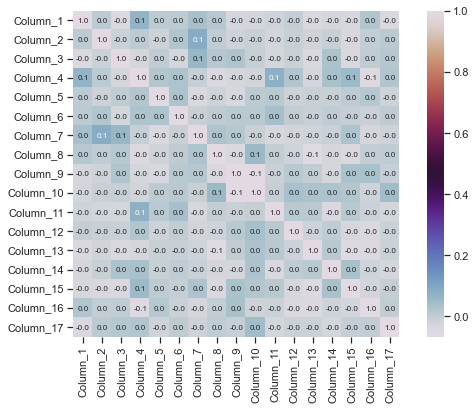

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation, cbar=True, square=True, fmt= '.1f', annot = True, annot_kws={'size':8}, cmap='twilight')

Model Training and Testing

In [30]:
df.shape

(1000, 17)

In [31]:
df.head(2)

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11,Column_12,Column_13,Column_14,Column_15,Column_16,Column_17
0,1.591749,2.511862,1.846446,1.574402,1.102097,2.076319,1.151038,4.447049,6.629824,0.967204,3.137792,1.505348,1.678866,5.196508,0.147371,0.182322,0.040851
1,3.574975,3.011568,4.080629,7.690444,3.210479,1.237859,3.033072,0.251749,2.042864,0.309459,5.788841,1.475655,1.071131,0.614561,2.976510,1.218165,1.680669


In [32]:
X=df.drop('Column_1', axis=1)
print(X)

     Column_2   Column_3  Column_4  Column_5  Column_6  Column_7  Column_8  \
0    2.511862   1.846446  1.574402  1.102097  2.076319  1.151038  4.447049   
1    3.011568   4.080629  7.690444  3.210479  1.237859  3.033072  0.251749   
2    1.922762   1.893993  1.919096  5.755830  2.290278  0.891037  1.149065   
3    8.908995   0.215270  0.468603  0.351827  2.117485  0.584161  1.255883   
4    0.202070   7.498063  1.264673  7.523854  1.856957  2.688491  0.079953   
..        ...        ...       ...       ...       ...       ...       ...   
995  2.297216   1.295595  1.832883  1.359420  0.045675  4.311554  4.925795   
996  2.945592   0.362167  2.764394  2.598749  1.744156  0.584657  3.023244   
997  4.007889   6.339750  0.014374  1.064514  9.067896  1.543160  0.737805   
998  0.567957   1.308693  1.487986  0.999858  0.109110  1.476770  0.119666   
999  1.777901  11.413235  0.021318  1.019740  0.302306  5.528416  6.789418   

     Column_9  Column_10  Column_11  Column_12  Column_13  Colu

In [33]:
y=df['Column_1']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(1000, 16) (800, 16) (200, 16)


In [36]:
print(y.shape, y_train.shape, y_test.shape)

(1000,) (800,) (200,)


In [37]:
a= LinearRegression()

In [38]:
a.fit(X_train, y_train)

LinearRegression()

In [39]:
predictions = a.predict(X_test)

In [40]:
predictions

array([2.24157021, 2.05048111, 1.99472579, 2.3620966 , 2.59930945,
       2.36112885, 1.74272966, 2.09293204, 1.7262102 , 1.6491088 ,
       2.17808573, 2.06970361, 1.52731749, 2.22102476, 2.11715882,
       2.24575764, 1.93741694, 2.10282092, 1.83998873, 2.0038277 ,
       1.80527156, 2.31807652, 1.6885686 , 1.49618499, 2.15938989,
       2.05189221, 2.14058065, 1.91509959, 2.33521959, 1.97913187,
       2.17073595, 2.64821569, 2.1887246 , 1.98192919, 1.92029665,
       2.11861737, 2.40429599, 1.88728038, 1.95501318, 2.0474193 ,
       1.96070947, 1.82393399, 2.03401479, 1.78125192, 1.44624954,
       2.34963263, 1.83815869, 2.01636227, 2.6804521 , 2.00276488,
       1.41017429, 1.83665301, 2.10503659, 2.09006141, 1.5572063 ,
       2.03522143, 2.13357798, 1.90400381, 1.82953656, 1.7550731 ,
       2.01701375, 1.83993468, 2.06113192, 1.97973654, 1.98776558,
       1.97282835, 1.6544234 , 2.27110134, 1.9378907 , 2.13719044,
       2.20875804, 1.9251406 , 2.05465916, 1.86429223, 1.68211

In [41]:
b=RandomForestRegressor()

In [42]:
b.fit(X_train, y_train)

RandomForestRegressor()

In [43]:
from sklearn import metrics
training_data_prediction=a.predict(X_train)
r2_train= metrics.r2_score(y_train, training_data_prediction)
print('Squared Value:' ,r2_train)

Squared Value: 0.01609071747909052


In [44]:
training_data_prediction=b.predict(X_train)
r2_train= metrics.r2_score(y_train, training_data_prediction)
print('Squared Value:' ,r2_train)

Squared Value: 0.8446352166926174


In [45]:
y_predi = a.predict(X_test)

In [46]:
y_pred = b.predict(X_test)

In [47]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 4.168567983736573
Root Mean Squared Error: 2.0417071248679552


In [48]:
mse = mean_squared_error(y_test, y_predi)
rmse = mse ** 0.5
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 3.583667491625115
Root Mean Squared Error: 1.893057709533736


In [49]:
input_data= (2.511862,1.846446,1.574402,1.102097,2.076319,1.151038,4.447049,6.629824,0.967204,3.137792,1.505348,1.678866,5.196508,0.147371,0.182322,0.040851)
#changing the input data to numpy array
input_data_as_numpy_array= np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction= a.predict(input_data_reshaped)
print(prediction)

print("The predicted win is :", prediction[0])

[1.97115828]
The predicted win is : 1.971158281202421
